In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [3]:
train_dataset = train.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset/train",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset/val",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 879 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [5]:
validation_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load the MobileNetV2 model with pretrained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the updated model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Feature reduction
    Dropout(0.2),  # Add dropout for regularization (20%)
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)


C:\Users\lamim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/29 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 0.4518 - loss: 0.9608 - precision: 0.4518 - recall: 0.4518

C:\Users\lamim\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 879ms/step - accuracy: 0.4994 - loss: 0.8837 - precision: 0.4994 - recall: 0.4994 - val_accuracy: 0.7143 - val_loss: 0.6023 - val_precision: 0.7143 - val_recall: 0.7143
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 639ms/step - accuracy: 0.6508 - loss: 0.6543 - precision: 0.6508 - recall: 0.6508 - val_accuracy: 0.7500 - val_loss: 0.5493 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 642ms/step - accuracy: 0.7064 - loss: 0.5878 - precision: 0.7064 - recall: 0.7064 - val_accuracy: 0.7232 - val_loss: 0.5074 - val_precision: 0.7232 - val_recall: 0.7232
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 658ms/step - accuracy: 0.7638 - loss: 0.4958 - precision: 0.7638 - recall: 0.7638 - val_accuracy: 0.7768 - val_loss: 0.4759 - val_precision: 0.7768 - val_recall: 0.7768
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 648ms/step - accuracy: 0.7945 - loss: 0.4333 - precision: 0.7945 - recall: 0.7945 - val_accuracy: 0.7768 - val_loss: 0.4667 -

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images

test_dataset = test_datagen.flow_from_directory(
    "C:/Users/lamim/Desktop/N_Thesis/split_dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 112 images belonging to 2 classes.


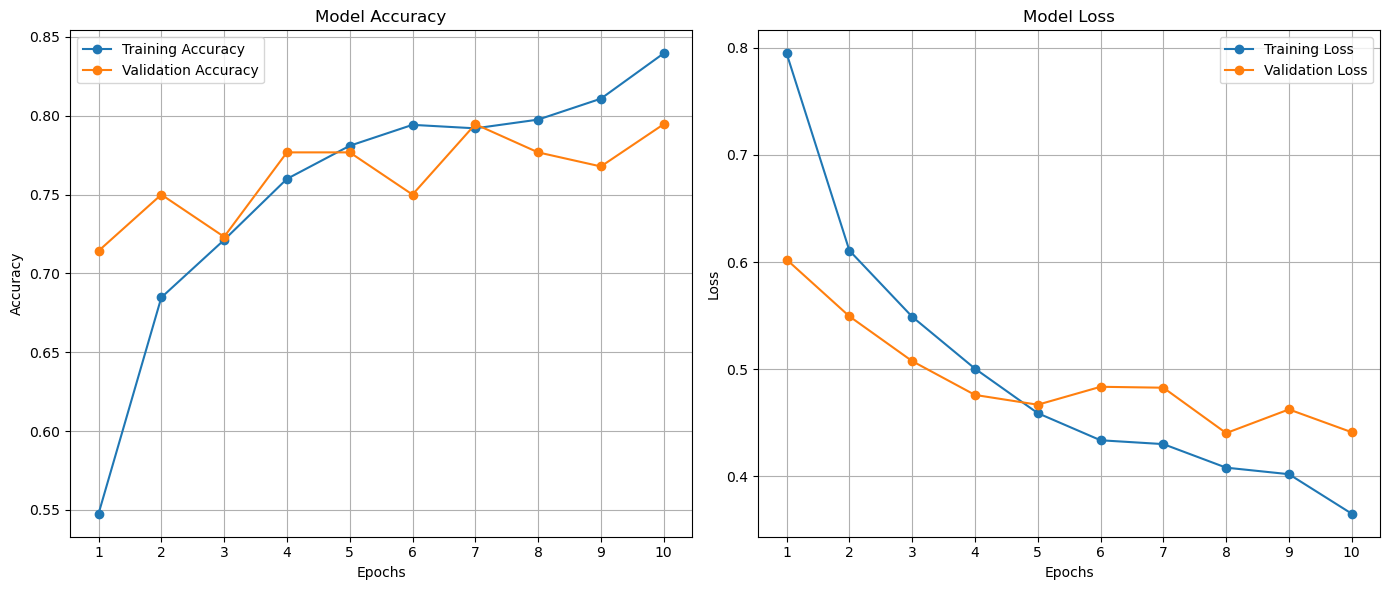

Plot saved to: C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_MobileNetV2\training_plot.png


In [11]:
import matplotlib.pyplot as plt
import os
import csv

# Example: extracting history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create an output directory if you like
output_dir = "my_results"
os.makedirs(output_dir, exist_ok=True)

# Save your CSV logs (optional, if desired)
csv_path = os.path.join(output_dir, "training_log.csv")
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_accuracy[epoch-1],
            val_accuracy[epoch-1],
            train_loss[epoch-1],
            val_loss[epoch-1]
        ])

# Plot
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()
# Suppose you want a folder "RESULT_DenseNet121" + a filename "training_plot.png"
output_dir = r"C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_MobileNetV2"
os.makedirs(output_dir, exist_ok=True)  # Create folder if needed

fig_path = os.path.join(output_dir, "training_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()

print(f"Plot saved to: {fig_path}")


In [13]:
results = model.evaluate(test_dataset)  # Evaluate the test dataset
test_acc = results[1] 

print(f"Test Accuracy: {test_acc:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 560ms/step - accuracy: 0.7646 - loss: 0.4564 - precision: 0.7646 - recall: 0.7746
Test Accuracy: 0.7646


In [14]:
test_acc, test_precision, test_recall = results  # Unpack all metrics

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


Test Accuracy:0.7646
Test Precision: 0.7646
Test Recall: 0.7746
